In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
from torchvision import models
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torchvision.datasets as datasets # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms # Transformations we can perform on our dataset
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader, Dataset # Gives easier dataset managment and creates mini batches
from torchvision.datasets import ImageFolder
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
from torch.optim import lr_scheduler
from PIL import Image
from tqdm import tqdm
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_cifar10_data(filename):
    with open('../datasets/cifar10/cifar-10-batches-py/'+ filename, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data']
    labels = batch['labels']
    return features, labels

In [ ]:
# Load files
batch_1, labels_1 = load_cifar10_data('data_batch_1')
batch_2, labels_2 = load_cifar10_data('data_batch_2')
batch_3, labels_3 = load_cifar10_data('data_batch_3')
batch_4, labels_4 = load_cifar10_data('data_batch_4')
batch_5, labels_5 = load_cifar10_data('data_batch_5')

In [ ]:
# print(batch_1)
# print(labels_1)
freq_1 = []
freq_2 = []
freq_3 = []
freq_4 = []
freq_5 = []

for x in range (10):
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    for img_label in labels_1:
        if img_label == x:
            count_1 += 1
    for img_label in labels_2:
        if img_label == x:
            count_2 += 1
    for img_label in labels_3:
        if img_label == x:
            count_3 += 1
    for img_label in labels_4:
        if img_label == x:
            count_4 += 1
    for img_label in labels_5:
        if img_label == x:
            count_5 += 1
    
    freq_1.append(count_1)
    freq_2.append(count_2)
    freq_3.append(count_3)
    freq_4.append(count_4)
    freq_5.append(count_5)

print(freq_1)
print(freq_2)
print(freq_3)
print(freq_4)
print(freq_5)


In [2]:
idx_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq_1)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.title("Batch 1")
plt.show()

NameError: name 'freq_1' is not defined

<Figure size 864x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq_2)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.title("Batch 2")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq_3)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.title("Batch 3")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq_4)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.title("Batch 4")
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq_5)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.title("Batch 5")
plt.show()

In [3]:
batch1_dataset = ImageFolder("../datasets/cifar10_png/train/")

print("10 classes: ",batch1_dataset.classes)
print("Batch 1 size: ", len(batch1_dataset))

10 classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Batch 1 size:  10000


[1005, 974, 1032, 1016, 999, 937, 1030, 1001, 1025, 981]


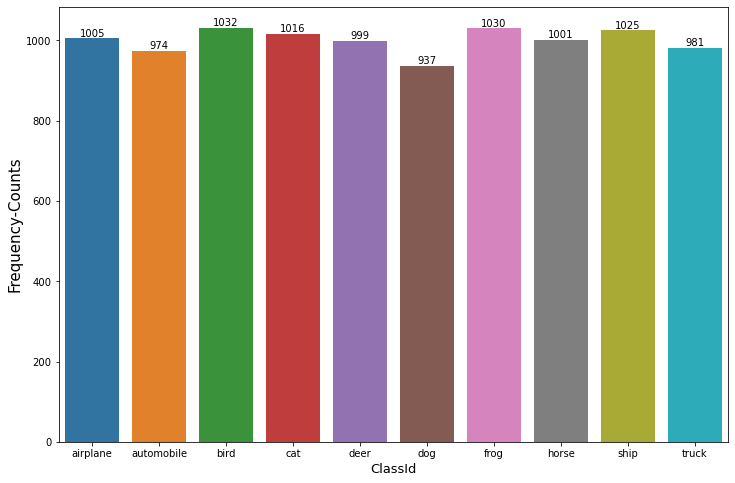

In [4]:
freq = []
epc = []
idx_to_class = list(batch1_dataset.classes)

for x in range (10):
    count = 0
    
    for img_class in batch1_dataset.targets:
        if img_class == x:
            count += 1
    epc.append(x)
    freq.append(count)

print(freq)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=idx_to_class, y=freq)
ax.bar_label(ax.containers[0])
plt.ylabel('Frequency-Counts', fontsize=15)
plt.xlabel('ClassId',fontsize=13)
plt.show()

In [5]:
class_weights = []
accum = 0


for count in freq:
    weight = num_samples/count
    class_weights.append(weight)
    accum += weight

print(class_weights)
print(accum)

[9.950248756218905, 10.26694045174538, 9.689922480620154, 9.84251968503937, 10.01001001001001, 10.672358591248665, 9.70873786407767, 9.99000999000999, 9.75609756097561, 10.193679918450561]
100.0805253083963


In [6]:
class_counts = freq
num_samples = sum(freq)

labels = batch1_dataset.targets #corresponding labels of samples
class_weights = [num_samples/class_counts[i] for i in range(len(class_counts))]
weights = [class_weights[labels[i]] for i in range(int(num_samples))]
sampler = torch.utils.data.sampler.WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))

print("Class Weight: ",class_weights)

trainloader = DataLoader(batch1_dataset, 
                        batch_size=50, 
                        sampler=sampler,
                        shuffle=False,
                        num_workers=4, 
                        pin_memory=False)

Class Weight:  [9.950248756218905, 10.26694045174538, 9.689922480620154, 9.84251968503937, 10.01001001001001, 10.672358591248665, 9.70873786407767, 9.99000999000999, 9.75609756097561, 10.193679918450561]


In [18]:
new_freq = []
for x in range(10):
    count = 0
    for image,labels in trainloader:
        for item_label in labels:
            if item_label == x:
                count += 1
    #     if label.item() == x:
    #         count += 1
    new_freq.append(count)

print(new_freq)